In [1]:
import numpy as np
from matplotlib.pyplot import *
from spectral import imshow, view_cube
import spectral.io.envi as envi
from skimage import io
%matplotlib widget

In [2]:
find_index = lambda x, wvls: np.argmin(np.abs(wvls - x), axis = 0)

In [3]:
sample_image = io.imread(r'D:/Data/Data_HSI/CRAS/Sample_Images/s_antonio_image.jpeg')

In [4]:
fpath = r'D:/Data/Data_HSI/CRAS/HySpex/Transmitancia/'
fname_ref = r'Santo Antonio/Santo Antonio_01_Mjolnir_S620_SN7087_raw_rad_keystone_smile_float32'
fnam_white = r'Reference White/Reference White_01_Mjolnir_S620_SN7087_raw_rad_keystone_smile_float32'

In [85]:
data_ref = envi.open(fpath + fname_ref + '.hdr', fpath + fname_ref + '.img')
data_white = envi.open(fpath + fnam_white + '.hdr', fpath + fnam_white + '.img')
data_nparr = np.array(data_ref.load())[520:1300, 40:300]
data_white = np.array(data_white.load())[500:1100, 100:300, :].mean(axis = (0, 1))

In [86]:
corrected_nparr = data_nparr/data_white
bands = np.array(data_ref.bands.centers)

In [87]:
specim_fps = 1/(10e-3)
stage_speed = 10e-3

In [88]:
data_reg = corrected_nparr#[220:670, 245:515]
y_size = data_reg.shape[0]/specim_fps*stage_speed * 1e2 #cm
x_size = 0.08 * 1e2 #cm

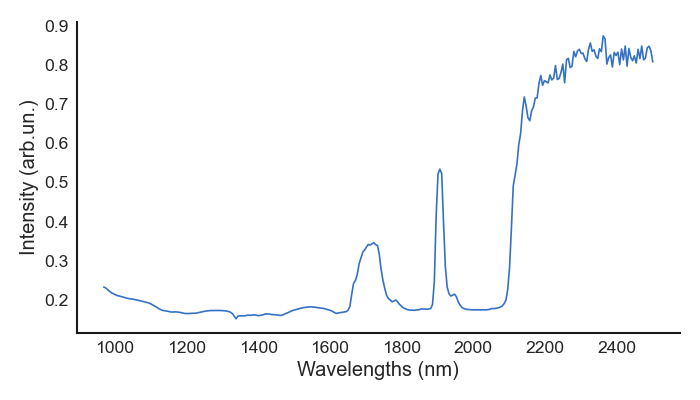

In [98]:
fig, ax = subplots(1, 1, figsize = (10, 4))

wl = 1900 #450

axs = ax[0]
axs.plot(bands, data_reg.mean(axis = (0, 1)))
axs.axvline(wl, color = 'r')
axs.set_xlabel('Wavelengths (nm)')
axs.set_ylabel('Intensity (arb.un.)')
axs.grid(False)

axs = ax[1]
axs.imshow(data_reg[::, ::-1, find_index(wl, bands)], cmap = 'gist_stern', extent = (0, x_size, 0, y_size))
axs.grid(False)
axs.set_xlabel('x (cm)')
axs.set_ylabel('y (cm)')

fig.tight_layout()

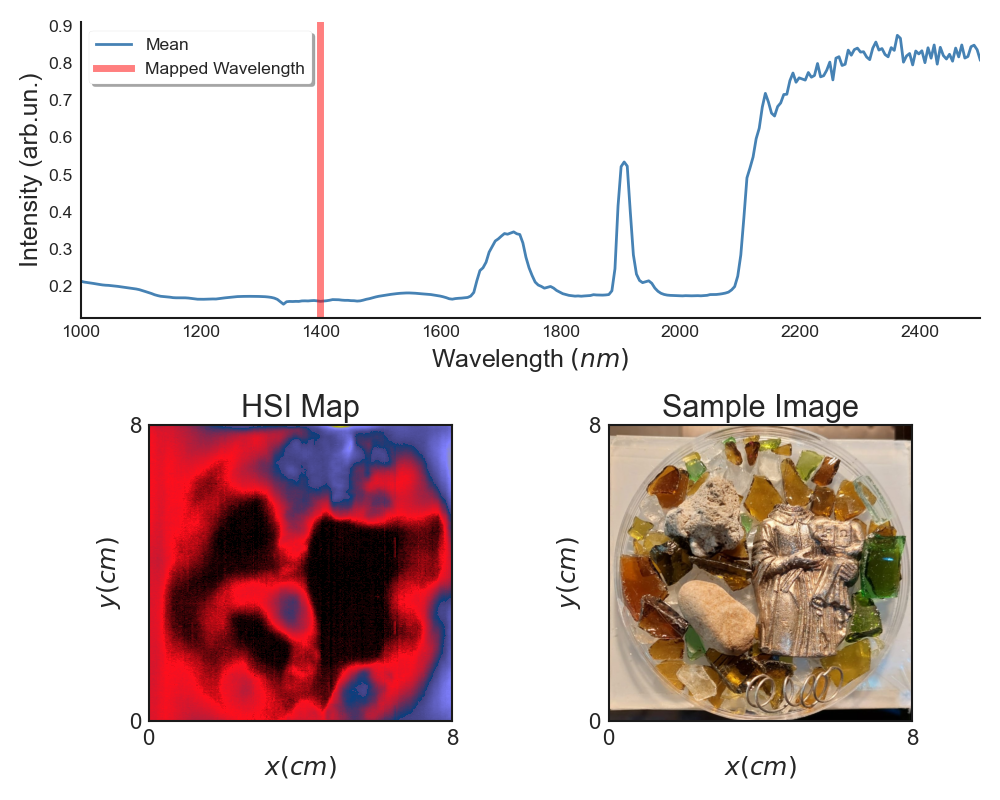

In [105]:
from matplotlib import gridspec

from mpl_toolkits.axes_grid1.inset_locator import mark_inset

matplotlib.rcParams['axes.linewidth'] = 1.5
matplotlib.rcParams['axes.edgecolor'] = '0.1'

fig = figure(tight_layout = True, figsize = (10, 8))
gs = gridspec.GridSpec(2, 2)

ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])


axs = ax1
# axs.set_title('Mean VIR-NIR HSI Transmittance Signal', fontsize = 22)
axs.plot(bands, data_reg.mean(axis = (0, 1)), lw = 2, ls = '-', color = 'steelblue', label = 'Mean')
axs.set_xlim(1000, 2500)
axs.spines[['right', 'top']].set_visible(False)

wn = 1400#1336#1100
wv = find_index(wn, bands)
line = axs.axvline(wn, lw = '5', alpha = 0.5, color = 'red', label = 'Mapped Wavelength')
axs.set_xlabel(r'Wavelength $(nm)$', fontsize = 18)
axs.set_ylabel(r'Intensity (arb.un.)', fontsize = 18)
axs.legend(fancybox = True, shadow = True)
axs.grid(False)

axs = ax2
axs.set_title('HSI Map', fontsize = 22)
# axs.imshow(image_var, extent = (0, 90, 0, 80))
# axs.imshow(spectrum[:, :, wn], cmap = my_cmap, extent = (0, 90, 0, 80), interpolation = 'gaussian')

axs.imshow(data_reg[:, :, find_index(wn, bands)], cmap = 'gist_stern', extent = (0, x_size, 0, y_size))
axs.set_xlabel(r'$x(cm)$', fontsize = 18)
axs.set_ylabel(r'$y(cm)$', fontsize = 18)
axs.set_xticks([0, x_size])
axs.set_xticklabels([0, int(np.round(x_size))], fontsize = 16)
axs.set_yticks([0, y_size])
axs.set_yticklabels([0, int(np.round(y_size))], fontsize = 16)
axs.grid(False)

axs = ax3
axs.set_title('Sample Image', fontsize = 22)
axs.imshow(sample_image, extent = (0, x_size, 0, y_size))
axs.set_xlabel(r'$x(cm)$', fontsize = 18)
axs.set_ylabel(r'$y(cm)$', fontsize = 18)
axs.set_xticks([0, x_size])
axs.set_xticklabels([0, int(np.round(x_size))], fontsize = 16)
axs.set_yticks([0, y_size])
axs.set_yticklabels([0, int(np.round(y_size))], fontsize = 16)
axs.grid(False)

fig.tight_layout()
# savefig('hyspex_1900.jpg', dpi = 300, bbox_inches = 'tight')

In [129]:
np.round(y_size)

7.0